# Introduction

The telecommunications company Megaline offers its customers prepaid plans, **Surf** and **Ultimate**. The sales department wants to know which of the plans generate the most revenue in order to adjust the advertising budget.

A first analysis of the plans must be carried out based on a small selection of customers. Data from 500 Megaline customers is available:
- who they are;
- where they are from;
- which plan they use;
- the number of calls they made;
- and the number of messages they sent in 2018.

Customer behavior must be analyzed and which prepaid plans generate the most revenue.

# Objective

To analyze the behavior of Surf and Ultimate plan users throughout 2018 in relation to the number of calls, minutes used, messages sent and internet/data consumption.

The evolution of revenues during this period will be verified, as well as whether the average revenue of plan users is the same and whether the average revenue of users in the NY-NJ area is the same as that of users in other areas.

## Initialization

Importing libraries for use during data analysis.

In [1]:
# Loading all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math as mt
from scipy import stats as st

## Loading data

Loading data from files about plans, users, calls, messages and internet.

In [2]:
# Loading data files
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')
df_calls = pd.read_csv('megaline_calls.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_internet = pd.read_csv('megaline_internet.csv')

## Preparing data for analysis

The data for this project is divided into the following data files:
- megaline_calls.csv - information about calls
- megaline_internet.csv - information about internet consumption
- megaline_messages.csv - information about messages
- megaline_plans.csv - information about plans
- megaline_users.csv - information about users

Analysis of the information in the files will be performed to gain an initial understanding of the data and make any necessary corrections to each file, if necessary.

## Plan Information

Below is a description of the plan data.

- `plan_name` — the name of the calling plan
- `usd_monthly_fee` — monthly price in US dollars
- `minutes_included` — monthly package of minutes
- `messages_included` — monthly package of text messages
- `mb_per_month_included` — data volume package (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limit (for example, if the package includes 100 minutes, the first minute in excess will be charged)
- `usd_per_message` — price per text message after exceeding the package limit
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limit (1 GB = 1024 megabytes)

In [3]:
# Printing general/summary information about the plans DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for the plans
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data file about the Plans contains 2 rows with 8 columns, each of these two for each plan. There is no inconsistency in the classification regarding the data types and we also have no missing values.

## User Data

Below we have the description of the User data.

- `user_id` — user identification
- `first_name` — user's first name
- `last_name` — user's last name
- `age` — user's age (in years)
- `reg_date` — registration date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the plan was being used when this data was generated)
- `city` — user's city of residence
- `plan` — plan name

In [5]:
# Printing general/summary information about the users DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
display(df_users.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


The User data file contains 500 rows with 8 columns. Inconsistencies are observed in the classification regarding the data types of the `reg_date` (registration date) and `churn_date` (date the user stopped using the service) columns, which are as objects, and in the latter we also have missing values ​​present.

The data of these two columns will be changed to the date type and the missing values ​​of the `churn_date` column will be replaced with the date of the last day of the year 2018 (2018-12-31) which is the reference year of the data, since these refer to plans active until the end of this year.

### Correcting user file data

In [7]:
# Formatting data types for Date/Time
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# Checking
df_users.info()
display(df_users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


Missing values ​​in the `churn_date` column will be replaced by the date 2018-12-31, since these are people who did not leave the plan, therefore, on the last day of December 2018 they still had the plans contracted.

In [8]:
# Replacing missing values ​​from column 'churn_date' with date 2018-12-31
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

# Checking
df_users.info()
print()
display(df_users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31


In [9]:
# Reformatting the data types to Date/Time for the 'churn_date' column
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# Checking
df_users.info()
print()
display(df_users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31


### Checking for duplicate data about users

In [10]:
# Checking for duplicate data
df_users_dupl = df_users.duplicated().sum()
print(df_users_dupl)

0


## Call Data

Below we have the description of the Call data.

- `id` — unique call identifier
- `call_date` — date of the call
- `duration` — duration of the call (in minutes)
- `user_id` — the identifier of the user making the call

In [11]:
# Printing general/summary information about the calls DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Printing a sample of data for calls
display(df_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


The Call data file contains 137735 rows with 4 columns. There is an inconsistency in the sorting regarding the data types of the `call_date` column that is an object.

The data in this column will be changed to the date type.

### Correcting call file data

In [13]:
# Formatting data types for Date/Time
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Checking
df_calls.info()
display(df_calls.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Checking for duplicate call data

In [14]:
# Checking for duplicate data
df_calls_dupl = df_calls.duplicated().sum()
print(df_calls_dupl)

0


### Creating columns in the calls file

The following columns will be inserted into the dataframe:
- month - month
- day - day

In [15]:
# Inserting 'month' and 'day' columns
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month
df_calls['day'] = pd.to_datetime(df_calls['call_date']).dt.day

# Checking
display(df_calls.head(10))

,id,user_id,call_date,duration,month,day
0,1000_93,1000,2018-12-27,8.52,12,27
1,1000_145,1000,2018-12-27,13.66,12,27
2,1000_247,1000,2018-12-27,14.48,12,27
3,1000_309,1000,2018-12-28,5.76,12,28
4,1000_380,1000,2018-12-30,4.22,12,30
5,1000_388,1000,2018-12-31,2.20,12,31
6,1000_510,1000,2018-12-27,5.75,12,27
7,1000_521,1000,2018-12-28,14.18,12,28
8,1000_530,1000,2018-12-28,5.77,12,28
9,1000_544,1000,2018-12-26,4.40,12,26


## Message Data

Below we have the description of the Message data.

- `id` — unique identifier of text message
- `message_date` — date of the text message
- `user_id` — the identifier of the user who sent the text message

In [16]:
# Printing general/summary information about the messages DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Printing a sample of the data for the messages
display(df_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


The Messages data file contains 76051 rows with 3 columns. There is an inconsistency in the sorting regarding the data types of the `message_date` column (message date) that is an object.

The data in this column will be changed to the date type.

### Corrigindo dados do arquivo das mensagens

In [18]:
# Formatando os tipos de dados para Data/Hora
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# Checking
df_messages.info()
display(df_messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Checking for duplicate message data

In [19]:
# Checking for duplicate data
df_messages_dupl = df_messages.duplicated().sum()
print(df_messages_dupl)

0


### Creating columns in the message file

In [20]:
# Inserting 'month' and 'day' columns
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.month
df_messages['day'] = pd.to_datetime(df_messages['message_date']).dt.day

# Checking
display(df_messages.head(10))

,id,user_id,message_date,month,day
0,1000_125,1000,2018-12-27,12,27
1,1000_160,1000,2018-12-31,12,31
2,1000_223,1000,2018-12-31,12,31
3,1000_251,1000,2018-12-27,12,27
4,1000_255,1000,2018-12-26,12,26
5,1000_346,1000,2018-12-29,12,29
6,1000_386,1000,2018-12-30,12,30
7,1000_413,1000,2018-12-31,12,31
8,1000_502,1000,2018-12-27,12,27
9,1000_525,1000,2018-12-28,12,28


## Internet Data

Below we have the description of the Internet data.

- `id` — unique session identifier
- `mb_used` — the amount of data used during the session (in megabytes)
- `session_date` — date of the web session
- `user_id` — user identifier

In [21]:
# Printing general/summary information about the Internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprimindo uma amostra de dados para o tráfego da Internet
display(df_internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


The Internet data file contains 104825 rows with 4 columns. There is an inconsistency in the sorting regarding the data types of the `session_date` column (web session date) that is an object.

The data in this column will be changed to the date type.

### Correcting file data over the internet

In [23]:
# Formatting data types for Date/Time
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# Checking
df_internet.info()
display(df_internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### Checking for duplicate data on the internet

In [24]:
# Checking for duplicate data
df_internet_dupl = df_internet.duplicated().sum()
print(df_internet_dupl)

0


### Creating columns in the internet file

In [25]:
# Inserting 'month' and 'day' columns
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.month
df_internet['day'] = pd.to_datetime(df_internet['session_date']).dt.day

# Checking
display(df_internet.head(10))

,id,user_id,session_date,mb_used,month,day
0,1000_13,1000,2018-12-29,89.86,12,29
1,1000_204,1000,2018-12-31,0.00,12,31
2,1000_379,1000,2018-12-28,660.40,12,28
3,1000_413,1000,2018-12-26,270.99,12,26
4,1000_442,1000,2018-12-27,880.22,12,27
5,1001_0,1001,2018-08-24,284.68,8,24
6,1001_3,1001,2018-12-09,656.04,12,9
7,1001_4,1001,2018-11-04,16.97,11,4
8,1001_10,1001,2018-11-27,135.18,11,27
9,1001_15,1001,2018-12-13,761.92,12,13


## Conditions of plans under study

Megaline implements the following 'dynamics' in its plans:
- rounds seconds to minutes, and megabytes to gigabytes.
- For calls, each individual call is rounded up. Even if a call lasts only one second, it will be counted as one minute.
- For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. For example, if someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Plan conditions:

**Surf** Plan

1. Monthly price: $20
2. 500 monthly minutes, 50 text messages and 15 GB of data
3. After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: $10

**Ultimate** Plan

1. Monthly price: $70
2. 3000 monthly minutes, 1000 text messages and 30 GB of data
3. After exceeding the package limits:
- 1 minute: 1 cents
- 1 text message: 1 cents
- 1 GB of data: $7

In [26]:
# Print the plan conditions and make sure they are clear to you
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregated data by user

Dataframes will be created aggregating the data by user per period to have only one record per user per period to facilitate later analysis.

In [27]:
# Calculation of the number of calls per user per month.
# Table with the number of calls made by user per month
df_cal_user_month = df_calls.pivot_table(
    index=['user_id', 'month'], values='id', aggfunc='count').reset_index()

# Checking
display(df_cal_user_month)
print()
df_cal_user_month.info()

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  2258 non-null   int64
 1   month    2258 non-null   int32
 2   id       2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB


In [28]:
# Calculation of the number of minutes spent by each user per month
# Table with the number of minutes used per user per month
df_min_user_month = df_calls.pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()

# Checking
display(df_min_user_month)
print()
df_min_user_month.info()

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2258 non-null   int64  
 1   month     2258 non-null   int32  
 2   duration  2258 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 44.2 KB


In [29]:
# Calculation of the number of messages sent by each user per month
# Table with the number of messages sent by user per month
df_sms_user_month = df_messages.pivot_table(
    index=['user_id', 'month'], values='id', aggfunc='count').reset_index()

# Checking
display(df_sms_user_month)
print()
df_sms_user_month.info()


,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  1806 non-null   int64
 1   month    1806 non-null   int32
 2   id       1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB


In [30]:
# Calculation of the volume of internet traffic used by each user per month
# Table showing the volume of internet traffic used by user per month
df_net_user_month = df_internet.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()

# Checking
display(df_net_user_month)
print()
df_net_user_month.info()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2277 non-null   int64  
 1   month    2277 non-null   int32  
 2   mb_used  2277 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 44.6 KB


Now this data (created dataframes) will be aggregated into one to perform the necessary analyses.

In [31]:
# Joining in a dataframe the data
# of calls, minutes, messages, internet based on user_id and month
df_global = df_cal_user_month.merge(df_min_user_month, on=['user_id', 'month'])
df_global = df_global.merge(df_sms_user_month, on=['user_id', 'month'])
df_global = df_global.merge(df_net_user_month, on=['user_id', 'month'])

# Renaming columns
df_global.columns = ['user_id', 'month', 'qty_calls', 'duration_calls', 'qty_sms', 'mb_used']

# Verificando
display(df_global.head(10))


,user_id,month,qty_calls,duration_calls,qty_sms,mb_used
0,1000,12,16,116.83,11,1901.47
1,1001,8,27,171.14,30,6919.15
2,1001,9,49,297.69,44,13314.82
3,1001,10,65,374.11,53,22330.49
4,1001,11,64,404.59,36,18504.30
5,1001,12,56,392.93,44,19369.18
6,1002,10,11,54.13,15,6552.01
7,1002,11,55,359.76,32,19345.08
8,1002,12,47,363.24,41,14396.24
9,1003,12,149,1041.00,50,27044.14


In [32]:
# Adding plan information to the table
df_global = df_global.merge(df_users[['user_id', 'plan']], on=['user_id'])

# Verificando
display(df_global.head(60))
print()
df_global.info()

,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan
0,1000,12,16,116.83,11,1901.47,ultimate
1,1001,8,27,171.14,30,6919.15,surf
2,1001,9,49,297.69,44,13314.82,surf
3,1001,10,65,374.11,53,22330.49,surf
4,1001,11,64,404.59,36,18504.30,surf
5,1001,12,56,392.93,44,19369.18,surf
6,1002,10,11,54.13,15,6552.01,surf
7,1002,11,55,359.76,32,19345.08,surf
8,1002,12,47,363.24,41,14396.24,surf
9,1003,12,149,1041.00,50,27044.14,surf



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1759 non-null   int64  
 1   month           1759 non-null   int32  
 2   qty_calls       1759 non-null   int64  
 3   duration_calls  1759 non-null   float64
 4   qty_sms         1759 non-null   int64  
 5   mb_used         1759 non-null   float64
 6   plan            1759 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 89.4+ KB


Let's calculate the monthly revenue for each user, but first we will include the following columns in `df_global`:
- `plan_value`: plan values
- `minutes_included`: minutes included in the plans
- `sms_included`: messages included in the plans
- `mb_included`: internet included in the plans (data package)

In [33]:
# Adding the monthly plan price to the table
# Defining a function
def plan_value(plan):
    if plan == 'surf':
        return 20
    return 70
    
df_global['plan_value'] = df_global['plan'].apply(plan_value)

# Checking
df_global.info()
print()
display(df_global.head(60))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1759 non-null   int64  
 1   month           1759 non-null   int32  
 2   qty_calls       1759 non-null   int64  
 3   duration_calls  1759 non-null   float64
 4   qty_sms         1759 non-null   int64  
 5   mb_used         1759 non-null   float64
 6   plan            1759 non-null   object 
 7   plan_value      1759 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 103.2+ KB



,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value
0,1000,12,16,116.83,11,1901.47,ultimate,70
1,1001,8,27,171.14,30,6919.15,surf,20
2,1001,9,49,297.69,44,13314.82,surf,20
3,1001,10,65,374.11,53,22330.49,surf,20
4,1001,11,64,404.59,36,18504.30,surf,20
5,1001,12,56,392.93,44,19369.18,surf,20
6,1002,10,11,54.13,15,6552.01,surf,20
7,1002,11,55,359.76,32,19345.08,surf,20
8,1002,12,47,363.24,41,14396.24,surf,20
9,1003,12,149,1041.00,50,27044.14,surf,20


In [34]:
# Adding the minutes included in the plan
# Defining a function
def minutes_included(plan):
    if plan == 'surf':
        return 500
    return 3000

df_global['minutes_included'] = df_global['plan'].apply(minutes_included)

# Checking
df_global.info()
print()
display(df_global.head(60))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1759 non-null   int64  
 1   month             1759 non-null   int32  
 2   qty_calls         1759 non-null   int64  
 3   duration_calls    1759 non-null   float64
 4   qty_sms           1759 non-null   int64  
 5   mb_used           1759 non-null   float64
 6   plan              1759 non-null   object 
 7   plan_value        1759 non-null   int64  
 8   minutes_included  1759 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 116.9+ KB



,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000
1,1001,8,27,171.14,30,6919.15,surf,20,500
2,1001,9,49,297.69,44,13314.82,surf,20,500
3,1001,10,65,374.11,53,22330.49,surf,20,500
4,1001,11,64,404.59,36,18504.30,surf,20,500
5,1001,12,56,392.93,44,19369.18,surf,20,500
6,1002,10,11,54.13,15,6552.01,surf,20,500
7,1002,11,55,359.76,32,19345.08,surf,20,500
8,1002,12,47,363.24,41,14396.24,surf,20,500
9,1003,12,149,1041.00,50,27044.14,surf,20,500


In [35]:
# Adding the messages included in the plan
# Defining a function
def messages_included(plan):
    if plan == 'surf':
        return 50
    return 1000

df_global['sms_included'] = df_global['plan'].apply(messages_included)

# Checking
df_global.info()
print()
display(df_global.head(60))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1759 non-null   int64  
 1   month             1759 non-null   int32  
 2   qty_calls         1759 non-null   int64  
 3   duration_calls    1759 non-null   float64
 4   qty_sms           1759 non-null   int64  
 5   mb_used           1759 non-null   float64
 6   plan              1759 non-null   object 
 7   plan_value        1759 non-null   int64  
 8   minutes_included  1759 non-null   int64  
 9   sms_included      1759 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 130.7+ KB



,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000
1,1001,8,27,171.14,30,6919.15,surf,20,500,50
2,1001,9,49,297.69,44,13314.82,surf,20,500,50
3,1001,10,65,374.11,53,22330.49,surf,20,500,50
4,1001,11,64,404.59,36,18504.30,surf,20,500,50
5,1001,12,56,392.93,44,19369.18,surf,20,500,50
6,1002,10,11,54.13,15,6552.01,surf,20,500,50
7,1002,11,55,359.76,32,19345.08,surf,20,500,50
8,1002,12,47,363.24,41,14396.24,surf,20,500,50
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50


In [36]:
# Adding the internet (data package) included in the plan
# Defining a function
def mb_per_month_included(plan):
    if plan == 'surf':
        return 15360
    return 30720

df_global['mb_included'] = df_global['plan'].apply(mb_per_month_included)

# Checking
df_global.info()
print()
display(df_global.head(60))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1759 non-null   int64  
 1   month             1759 non-null   int32  
 2   qty_calls         1759 non-null   int64  
 3   duration_calls    1759 non-null   float64
 4   qty_sms           1759 non-null   int64  
 5   mb_used           1759 non-null   float64
 6   plan              1759 non-null   object 
 7   plan_value        1759 non-null   int64  
 8   minutes_included  1759 non-null   int64  
 9   sms_included      1759 non-null   int64  
 10  mb_included       1759 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 144.4+ KB



,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360


Now that the table has the columns `plan_value`, `minutes_included`, `sms_included` and `mb_included`, let's calculate the excess minutes, messages and internet (data) so we can find the monthly revenue for each user.

In [37]:
# Inserting column with excess minutes
df_global['surplus_min'] = df_global['minutes_included'] - df_global['duration_calls']

# Inserting column with excess messages
df_global['surplus_sms'] = df_global['sms_included'] - df_global['qty_sms']

# Inserting column with excess internet (data)
df_global['surplus_mb'] = df_global['mb_included'] - df_global['mb_used']

# Adjusting the results of each column
def surplus(surplus):
    if surplus >= 0:
        return 0
    return surplus*(-1)

df_global['surplus_min'] = df_global['surplus_min'].apply(surplus)
df_global['surplus_sms'] = df_global['surplus_sms'].apply(surplus)
df_global['surplus_mb'] = df_global['surplus_mb'].apply(surplus)

# Checking
df_global.info()
print()
display(df_global.head(60))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1759 non-null   int64  
 1   month             1759 non-null   int32  
 2   qty_calls         1759 non-null   int64  
 3   duration_calls    1759 non-null   float64
 4   qty_sms           1759 non-null   int64  
 5   mb_used           1759 non-null   float64
 6   plan              1759 non-null   object 
 7   plan_value        1759 non-null   int64  
 8   minutes_included  1759 non-null   int64  
 9   sms_included      1759 non-null   int64  
 10  mb_included       1759 non-null   int64  
 11  surplus_min       1759 non-null   float64
 12  surplus_sms       1759 non-null   int64  
 13  surplus_mb        1759 non-null   float64
dtypes: float64(4), int32(1), int64(8), object(1)
memory usage: 185.6+ KB



,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included,surplus_min,surplus_sms,surplus_mb
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720,0.00,0,0.00
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360,0.00,0,0.00
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360,0.00,0,0.00
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360,0.00,3,6970.49
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360,0.00,0,3144.30
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360,0.00,0,4009.18
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360,0.00,0,0.00
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360,0.00,0,3985.08
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360,0.00,0,0.00
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360,541.00,0,11684.14


Calculations of each user's monthly income will begin and columns will be inserted with the excess costs of calls, messages and internet (data).

In [38]:
# Calculating each user's monthly revenue
# Calculating excess call cost (minutes)
df_global['excess_min_cost'] = df_global['surplus_min'].apply(lambda x: mt.ceil(x))

def excess_min_cost(row):
    plan = row['plan']
    surplus_min = row['excess_min_cost']
    
    if plan == 'surf':
        return surplus_min*0.03
    return surplus_min*0.01

df_global['excess_min_cost'] = df_global.apply(excess_min_cost, axis=1)

display(df_global.head(60))

,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included,surplus_min,surplus_sms,surplus_mb,excess_min_cost
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720,0.00,0,0.00,0.00
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360,0.00,0,0.00,0.00
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360,0.00,0,0.00,0.00
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360,0.00,3,6970.49,0.00
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360,0.00,0,3144.30,0.00
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360,0.00,0,4009.18,0.00
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360,0.00,0,0.00,0.00
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360,0.00,0,3985.08,0.00
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360,0.00,0,0.00,0.00
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360,541.00,0,11684.14,16.23


In [39]:
display(df_plans)

# Calculating each user's monthly revenue
# Calculating message overage cost
def excess_sms_cost(row):
    plan = row['plan']
    surplus_sms = row['surplus_sms']
    
    if plan == 'surf':
        return surplus_sms*0.03
    return surplus_sms*0.01

df_global['excess_sms_cost'] = df_global.apply(excess_sms_cost, axis=1)

display(df_global.head(60))


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included,surplus_min,surplus_sms,surplus_mb,excess_min_cost,excess_sms_cost
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720,0.00,0,0.00,0.00,0.00
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360,0.00,3,6970.49,0.00,0.09
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360,0.00,0,3144.30,0.00,0.00
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360,0.00,0,4009.18,0.00,0.00
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360,0.00,0,3985.08,0.00,0.00
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360,541.00,0,11684.14,16.23,0.00


In [40]:
# Calculating the monthly revenue of each user
# Calculating the excess cost of internet (data)
df_global['excess_data_cost'] = (df_global['surplus_mb']/1000)
df_global['excess_data_cost'] = df_global['excess_data_cost'].apply(lambda x: mt.ceil(x))

def excess_data_cost(row):
    plan = row['plan']
    surplus_mb = row['excess_data_cost']
    
    if plan == 'surf':
        return surplus_mb*10
    return surplus_mb*7

df_global['excess_data_cost'] = df_global.apply(excess_data_cost, axis=1)

display(df_global.head(60))


,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included,surplus_min,surplus_sms,surplus_mb,excess_min_cost,excess_sms_cost,excess_data_cost
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720,0.00,0,0.00,0.00,0.00,0
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00,0
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00,0
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360,0.00,3,6970.49,0.00,0.09,70
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360,0.00,0,3144.30,0.00,0.00,40
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360,0.00,0,4009.18,0.00,0.00,50
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00,0
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360,0.00,0,3985.08,0.00,0.00,40
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360,0.00,0,0.00,0.00,0.00,0
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360,541.00,0,11684.14,16.23,0.00,120


Now the monthly revenue for each user will be calculated.

In [41]:
# Calculation of monthly revenue for each user
df_global['cost_month'] = df_global['plan_value'] +\
                            df_global['excess_min_cost'] +\
                            df_global['excess_sms_cost'] +\
                            df_global['excess_data_cost']

display(df_global.head(10))

,user_id,month,qty_calls,duration_calls,qty_sms,mb_used,plan,plan_value,minutes_included,sms_included,mb_included,surplus_min,surplus_sms,surplus_mb,excess_min_cost,excess_sms_cost,excess_data_cost,cost_month
0,1000,12,16,116.83,11,1901.47,ultimate,70,3000,1000,30720,0.0,0,0.00,0.00,0.00,0,70.00
1,1001,8,27,171.14,30,6919.15,surf,20,500,50,15360,0.0,0,0.00,0.00,0.00,0,20.00
2,1001,9,49,297.69,44,13314.82,surf,20,500,50,15360,0.0,0,0.00,0.00,0.00,0,20.00
3,1001,10,65,374.11,53,22330.49,surf,20,500,50,15360,0.0,3,6970.49,0.00,0.09,70,90.09
4,1001,11,64,404.59,36,18504.30,surf,20,500,50,15360,0.0,0,3144.30,0.00,0.00,40,60.00
5,1001,12,56,392.93,44,19369.18,surf,20,500,50,15360,0.0,0,4009.18,0.00,0.00,50,70.00
6,1002,10,11,54.13,15,6552.01,surf,20,500,50,15360,0.0,0,0.00,0.00,0.00,0,20.00
7,1002,11,55,359.76,32,19345.08,surf,20,500,50,15360,0.0,0,3985.08,0.00,0.00,40,60.00
8,1002,12,47,363.24,41,14396.24,surf,20,500,50,15360,0.0,0,0.00,0.00,0.00,0,20.00
9,1003,12,149,1041.00,50,27044.14,surf,20,500,50,15360,541.0,0,11684.14,16.23,0.00,120,156.23


## Studying user behavior

### Calls

Comparing the average call duration for each plan for each different month.

plan,surf,ultimate
month,,
1,278.850000,187.453333
2,313.240000,458.316000
3,324.985625,389.648571
4,346.206286,303.301250
5,418.675283,387.340952
6,401.525429,349.536757
7,426.454382,415.912979
8,404.183950,411.488246
9,402.010068,413.126479


(150.0, 500.0)

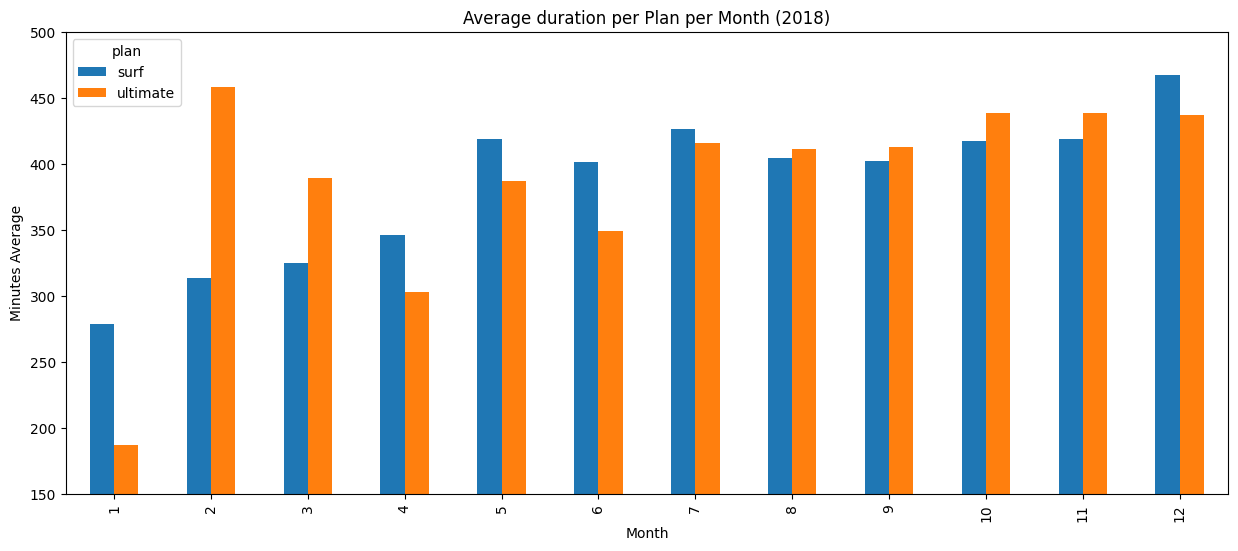

In [42]:
# Creating a pivot table
df_calls_mean_plan = df_global.pivot_table(index='month', columns='plan', values='duration_calls')

display(df_calls_mean_plan)

# Creating bar chart
df_calls_mean_plan.plot(kind='bar', figsize=(15, 6))
plt.title('Average duration per Plan per Month (2018)')
plt.ylabel('Minutes Average')
plt.xlabel('Month')
plt.ylim(150, 500)

Comparing the number of minutes that users of each plan require, in addition to the basic package, each month.

plan,surf,ultimate
month,,
1,0.00,0.0
2,269.02,0.0
3,426.20,0.0
4,1219.07,0.0
5,2989.52,0.0
6,3017.76,0.0
7,5527.93,0.0
8,5712.67,0.0
9,5836.53,0.0


array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

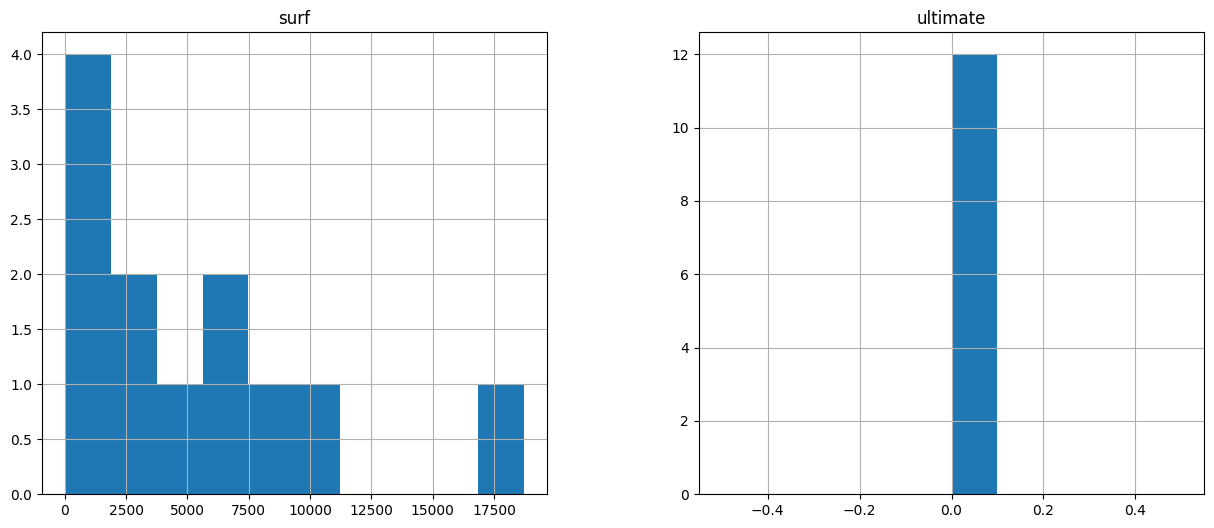

In [43]:
# Creating a pivot table
df_surplus_min_plan = df_global.pivot_table(
    index='month', columns='plan', values='surplus_min', aggfunc='sum')

display(df_surplus_min_plan)

# Creating histogram
df_surplus_min_plan.hist(figsize=(15, 6))

The **Averages** of call durations throughout the year and their **Standard Deviations** will be calculated to determine whether users of different plans behave differently in their calls.

In [44]:
# Calculating the average monthly call duration by plan
df_calls_mean_surf = df_calls_mean_plan['surf'].mean()
print('Average monthly call duration for those with the Surf Plan:', df_calls_mean_surf)
df_calls_mean_ultimate = df_calls_mean_plan['ultimate'].mean()
print('Average monthly call duration for those with the Ultimate Plan:', df_calls_mean_ultimate)
print()

# Calculating the Standard Deviation of monthly call duration by plan
df_calls_std_surf = df_calls_mean_plan['surf'].std()
print('The Standard Deviation (variation) of calls from those who have the Surf Plan:', df_calls_std_surf)
df_calls_std_ultimate = df_calls_mean_plan['ultimate'].std()
print('The Standard Deviation (variation) of calls from those who have the Ultimate Plan:', df_calls_std_ultimate)

Average monthly call duration for those with the Surf Plan: 385.0124234558398
Average monthly call duration for those with the Ultimate Plan: 385.8435809326907

The Standard Deviation (variation) of calls from those who have the Surf Plan: 55.85791458763214
The Standard Deviation (variation) of calls from those who have the Ultimate Plan: 75.81565125319888


At this point a box plot will be created to visualize the distribution of monthly call durations.

plan,surf,ultimate
month,,
1,278.85,562.36
2,1566.20,2291.58
3,5199.77,2727.54
4,12117.22,4852.82
5,22189.79,8134.16
6,28106.78,12932.86
7,37954.44,19547.91
8,48097.89,23454.83
9,59095.48,29331.98


<Axes: >

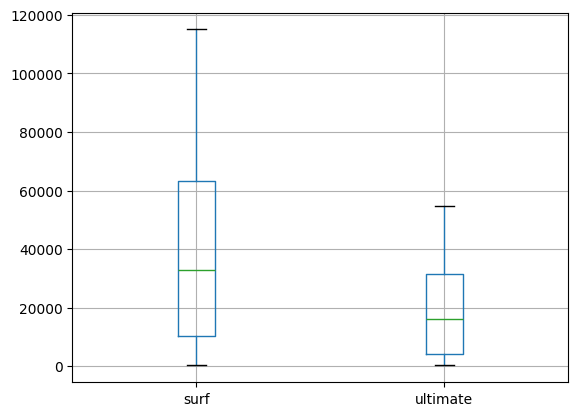

In [45]:
# Creating a pivot table
df_calls_duration_plan = df_global.pivot_table(index='month', columns='plan', values='duration_calls', aggfunc='sum')
display(df_calls_duration_plan)

df_calls_duration_plan.boxplot()

Users of both plans have an increasing trend in the duration of calls made throughout the year.

In January, users of the **Surf** plan had a higher volume of calls (duration) and in February, those of the **Ultimate** plan did so.

In the following months, we can say that call times were similar among users of both plans.

Users of the **Ultimate** plan did not use call minutes beyond the basic package contracted throughout the year.

On the other hand, users requested extra minutes throughout the year, with the exception of January.

The **Average** call duration of both plans is very similar, almost the same, however, a greater **Standard Deviation** is observed in the **Ultimate** plan.

### Messages

Comparing the number of messages that users on each plan tend to send each month throughout the year.

plan,surf,ultimate
month,,
1,21,62
2,108,139
3,351,243
4,864,463
5,1778,931
6,2292,1374
7,3096,1937
8,4439,2732
9,5672,3259


(0.0, 12000.0)

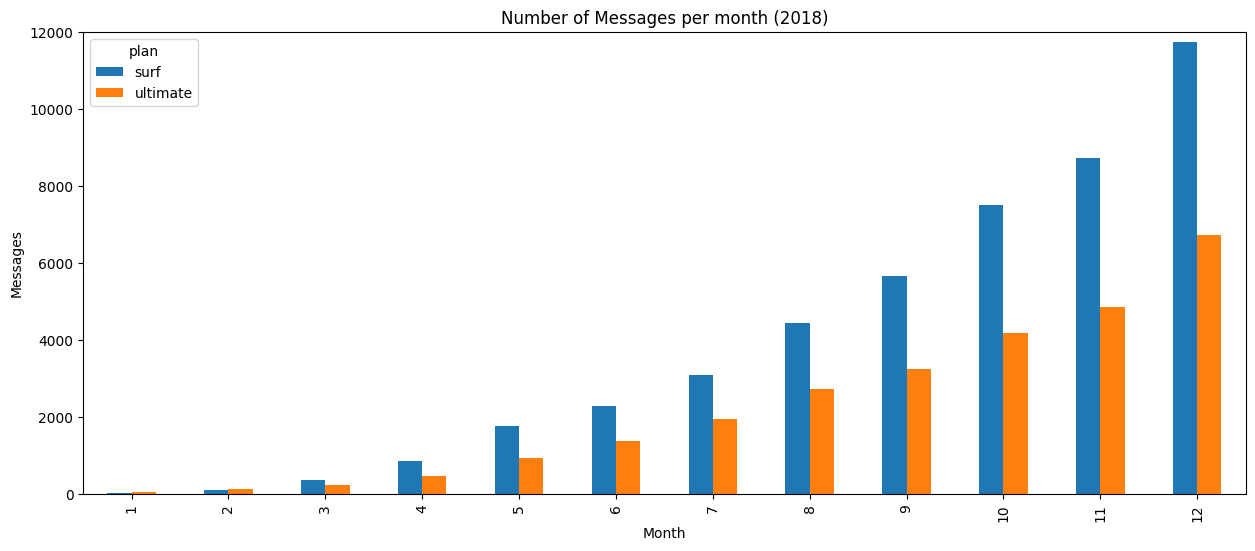

In [46]:
# Creating a pivot table
df_sms_plan = df_global.pivot_table(
    index='month', columns='plan', values='qty_sms', aggfunc='sum')

display(df_sms_plan)

# Creating bar chart
df_sms_plan.plot(kind='bar', figsize=(15, 6))
plt.title('Number of Messages per month (2018)')
plt.ylabel('Messages')
plt.xlabel('Month')
plt.ylim(0, 12000)

Comparing the number of messages that users of each plan require, beyond the basic package, each month.

plan,surf,ultimate
month,,
1,0,0
2,8,0
3,13,0
4,87,0
5,321,0
6,400,0
7,489,0
8,882,0
9,1083,0


array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

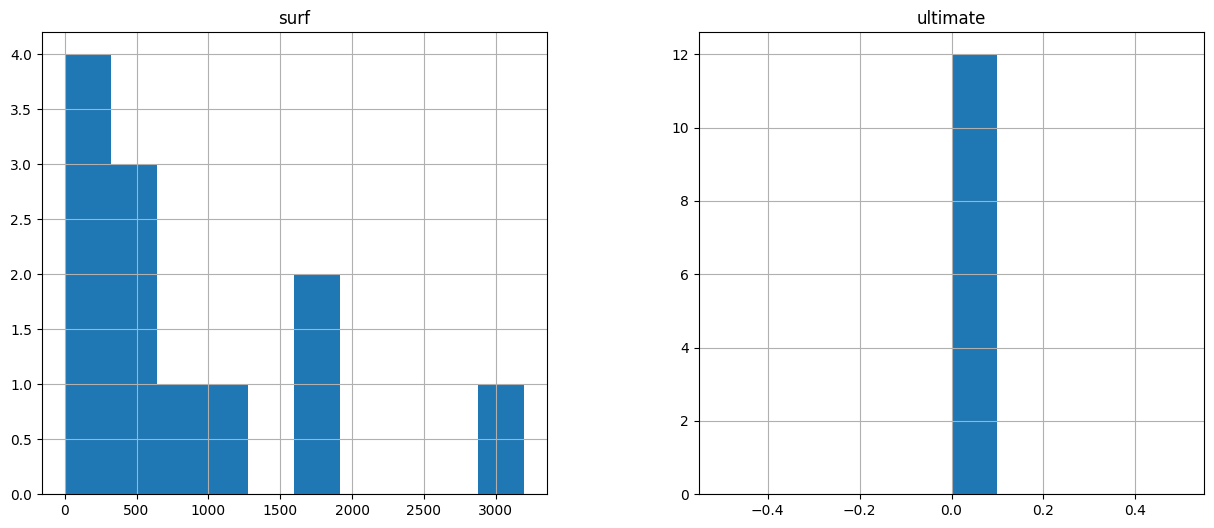

In [47]:
# Creating a pivot table
df_surplus_sms_plan = df_global.pivot_table(
    index='month', columns='plan', values='surplus_sms', aggfunc='sum')

display(df_surplus_sms_plan)

# Creating histogram
df_surplus_sms_plan.hist(figsize=(15, 6))


The averages of messages sent throughout the year and their standard deviations will be calculated to determine whether users of different plans have different behaviors.

Average number of messages sent by those who have the Surf Plan: 32.953049922550164
Average number of messages sent by Ultimate Plan users: 39.79336824397581

The Standard Deviation (variation) of messages sent by those who have the Surf Plan: 8.823855728894086
The Standard Deviation (variation) of messages sent by those who have the Ultimate Plan: 10.009961520436418


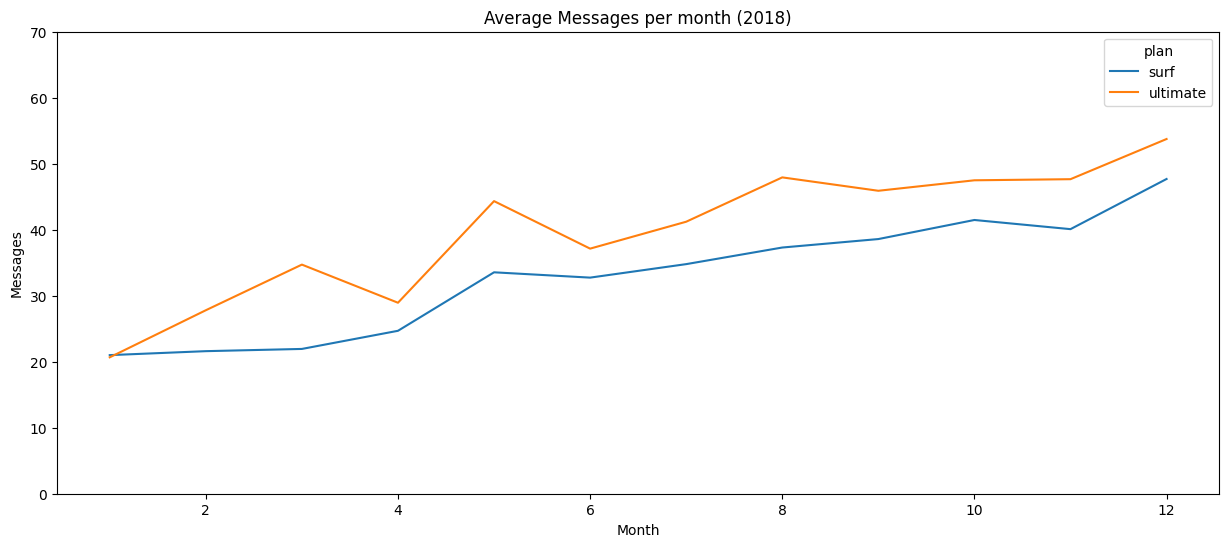

In [48]:
# Creating a pivot table
df_sms_mean_plan = df_global.pivot_table(
    index='month', columns='plan', values='qty_sms', aggfunc='mean')

# Creating line chart
df_sms_mean_plan.plot(kind='line', figsize=(15, 6))
plt.title('Average Messages per month (2018)')
plt.ylabel('Messages')
plt.xlabel('Month')
plt.ylim(0, 70)

# Calculating the average number of messages per plan
df_sms_mean_year_surf = df_sms_mean_plan['surf'].mean()
print('Average number of messages sent by those who have the Surf Plan:', df_sms_mean_year_surf)
df_sms_mean_year_ultimate = df_sms_mean_plan['ultimate'].mean()
print('Average number of messages sent by Ultimate Plan users:', df_sms_mean_year_ultimate)
print()

# Calculating the Standard Deviation of monthly call duration by plan
df_sms_std_year_surf = df_sms_mean_plan['surf'].std()
print('The Standard Deviation (variation) of messages sent by those who have the Surf Plan:', df_sms_std_year_surf)
df_sms_std_year_ultimate = df_sms_mean_plan['ultimate'].std()
print('The Standard Deviation (variation) of messages sent by those who have the Ultimate Plan:', df_sms_std_year_ultimate)


Users of both plans have an increasing tendency to send messages throughout the year. In the first months, very few messages are sent and in the last months the volume is high. With the exception of the first 3 months, users of the **Surf** plan sent a higher volume of messages than those of the **Ultimate** plan. The volume was almost twice as many messages sent.

Users of the **Surf** plan requested extra messages, in addition to the package, throughout the year (with the exception of January), and the requested volume increased as the months went by, peaking in December. Those of the **Ultimate** plan did not require extra messages.

Users of the **Ultimate** plan sent a higher average of messages than those of the **Surf** plan. This superiority was maintained in almost every month with the exception of January.

### Internet

Comparing the internet (data) consumption of users of each plan each month throughout the year.

plan,surf,ultimate
month,,
1,7894.79,20859.60
2,46553.82,86678.78
3,198357.48,166850.06
4,414788.20,228572.67
5,787125.24,356864.13
6,1089602.03,571687.82
7,1487064.36,775468.24
8,2042246.69,1024688.05
9,2424433.25,1165149.16


Text(0.5, 0, 'Month')

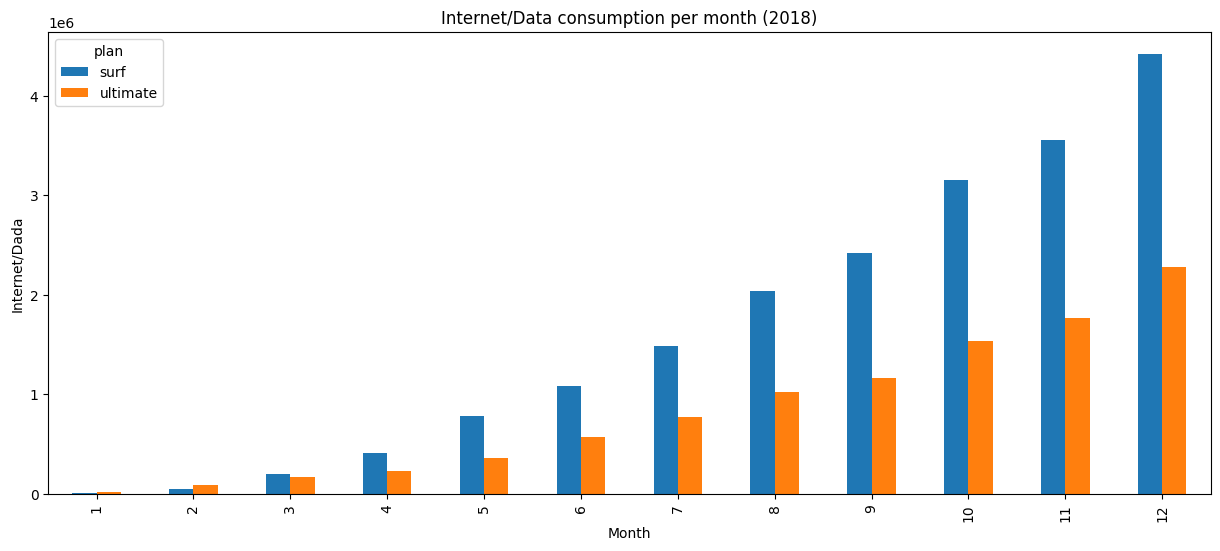

In [49]:
# Creating a pivot table
df_net_plan = df_global.pivot_table(
    index='month', columns='plan', values='mb_used', aggfunc='sum')

display(df_net_plan)

# Creating bar chart
df_net_plan.plot(kind='bar', figsize=(15, 6))
plt.title('Internet/Data consumption per month (2018)')
plt.ylabel('Internet/Dada')
plt.xlabel('Month')

Comparing the internet consumption (data) that users of each plan required, in addition to the basic package, each month.

plan,surf,ultimate
month,,
1,0.00,0.00
2,959.15,0.00
3,24719.31,5955.20
4,62404.74,7041.59
5,143208.20,2187.83
6,193873.49,10154.87
7,331587.82,15970.66
8,479029.08,19240.08
9,485414.88,12886.02


Text(0.5, 0, 'Month')

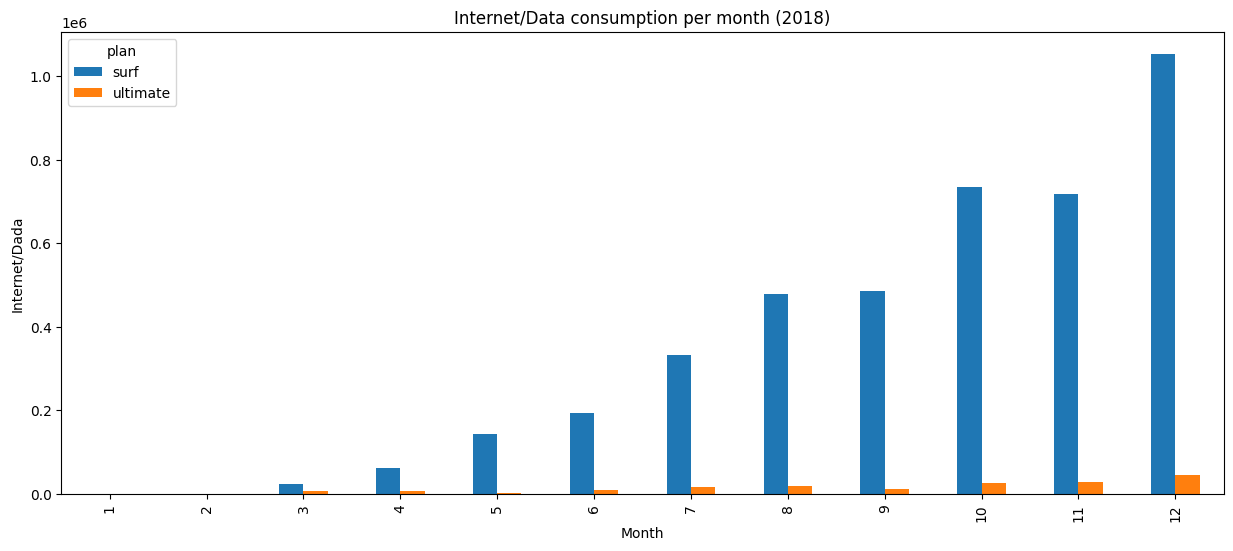

In [50]:
# Creating a pivot table
df_surplus_net_plan = df_global.pivot_table(
    index='month', columns='plan', values='surplus_mb', aggfunc='sum')

display(df_surplus_net_plan)

# Creating bar chart
df_surplus_net_plan.plot(kind='bar', figsize=(15, 6))
plt.title('Internet/Data consumption per month (2018)')
plt.ylabel('Internet/Dada')
plt.xlabel('Month')

The average internet/data consumption throughout the year and their standard deviations will be calculated to determine whether users of different plans have different behaviors.

plan,surf,ultimate
month,,
1,7894.790000,6953.200000
2,9310.764000,17335.756000
3,12397.342500,23835.722857
4,11851.091429,14285.791875
5,14851.419623,16993.530000
6,15565.743286,15451.022162
7,16708.588315,16499.324255
8,17161.736891,17976.983333
9,16492.743197,16410.551549


Average internet/data consumption for those with the Surf Plan: 14492.412797890333
Average internet/data consumption for those with the Ultimate Plan: 16570.427730256106

The Standard Deviation (variation) of internet/data consumption for those who have the Surf Plan: 3342.6088253645294
The Standard Deviation (variation) of internet/data consumption for those who have the Ultimate Plan: 3800.1884706245637


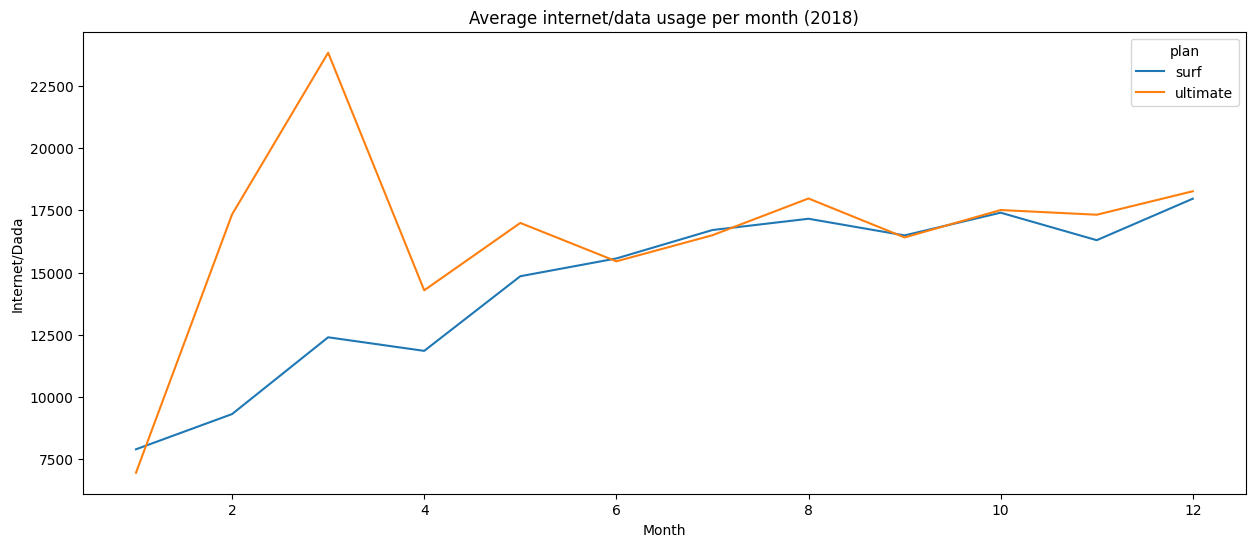

In [51]:
# Criando uma tabela dinâmica
df_net_mean_plan = df_global.pivot_table(
    index='month', columns='plan', values='mb_used', aggfunc='mean')

display(df_net_mean_plan)

# Creating line chart
df_net_mean_plan.plot(kind='line', figsize=(15, 6))
plt.title('Average internet/data usage per month (2018)')
plt.ylabel('Internet/Dada')
plt.xlabel('Month')

# Calculating the average internet/data per plan
df_net_mean_year_surf = df_net_mean_plan['surf'].mean()
print('Average internet/data consumption for those with the Surf Plan:', df_net_mean_year_surf)
df_net_mean_year_ultimate = df_net_mean_plan['ultimate'].mean()
print('Average internet/data consumption for those with the Ultimate Plan:', df_net_mean_year_ultimate)
print()

# Calculating the Standard Deviation of monthly call duration by plan
df_net_std_year_surf = df_net_mean_plan['surf'].std()
print('The Standard Deviation (variation) of internet/data consumption for those who have the Surf Plan:', df_net_std_year_surf)
df_net_std_year_ultimate = df_net_mean_plan['ultimate'].std()
print('The Standard Deviation (variation) of internet/data consumption for those who have the Ultimate Plan:', df_net_std_year_ultimate)


Users of both plans have an increasing tendency to use internet/data throughout the year. In the first months, consumption is lower and in the last months, the volume is higher. With the exception of the first 2 months, users of the **Surf** plan consumed a higher volume of internet/data than those of the **Ultimate** plan. A volume close to double the amount of internet/data consumed.

Users of the **Surf** plan requested much more extra internet/data, in addition to the contracted package, throughout the year (with the exception of January), and the volume requested increased as the months went by, peaking in December. Those of the **Ultimate** plan also requested an increasing volume of internet/data, but a much smaller amount per month.

Users of the **Ultimate** plan have a higher average internet/data consumption than those of the **Surf** plan. However, over the months, only in February, March, April and May was there a higher average consumption.

## Revenue

Comparing revenue earned between plans each month throughout the year.

plan,surf,ultimate
month,,
1,20.00,210.0
2,118.34,350.0
3,613.23,546.0
4,1429.36,1176.0
5,2699.66,1491.0
6,3642.81,2667.0
7,5550.87,3409.0
8,7758.36,4130.0
9,8458.17,5068.0


Text(0.5, 0, 'Month')

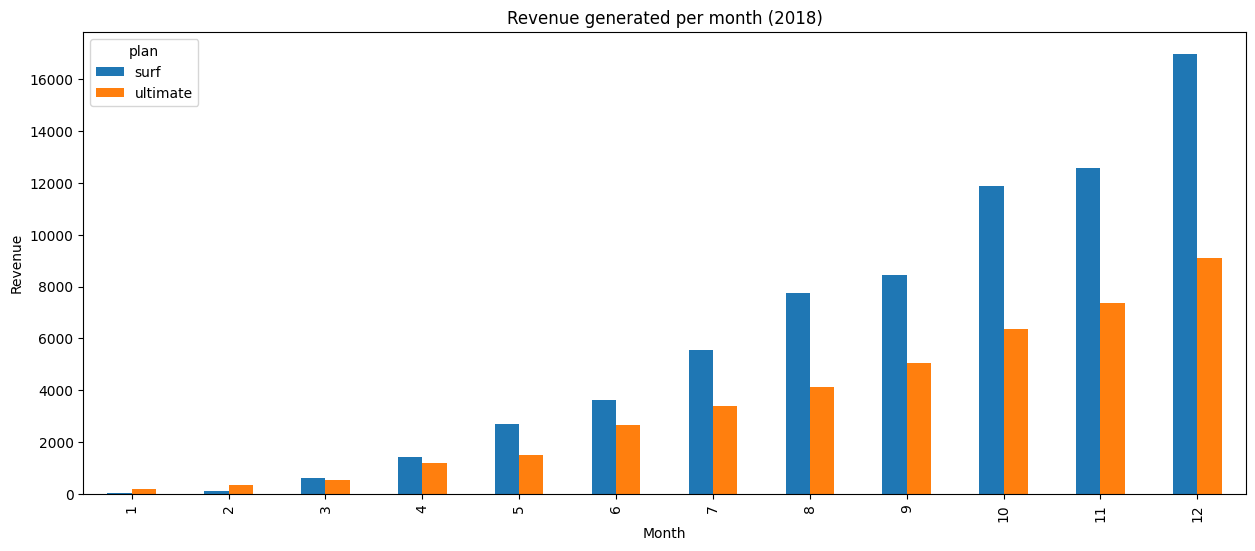

In [52]:
# Creating a pivot table
df_cost_plan = df_global.pivot_table(
    index='month', columns='plan', values='cost_month', aggfunc='sum')

display(df_cost_plan)

# Criando gráfico de barras
df_cost_plan.plot(kind='bar', figsize=(15, 6))
plt.title('Revenue generated per month (2018)')
plt.ylabel('Revenue')
plt.xlabel('Month')

Next, we will check the Average revenue obtained by plan throughout the year and the Standard Deviations of the same to reason whether users of the different plans have different behaviors.

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,23.668000,70.000000
3,38.326875,78.000000
4,40.838857,73.500000
5,50.936981,71.000000
6,52.040143,72.081081
7,62.369326,72.531915
8,65.196303,72.456140
9,57.538571,71.380282


Average revenue generated by those who have the Surf Plan: 50.2519809047684
Average revenue generated by those who have the Ultimate Plan: 72.35148759756636

The Standard Deviation (variation) of the revenue generated by those who have the Surf Plan: 16.286797383934818
The Standard Deviation (variation) of the revenue generated by those who have the Ultimate Plan: 2.077448797648823


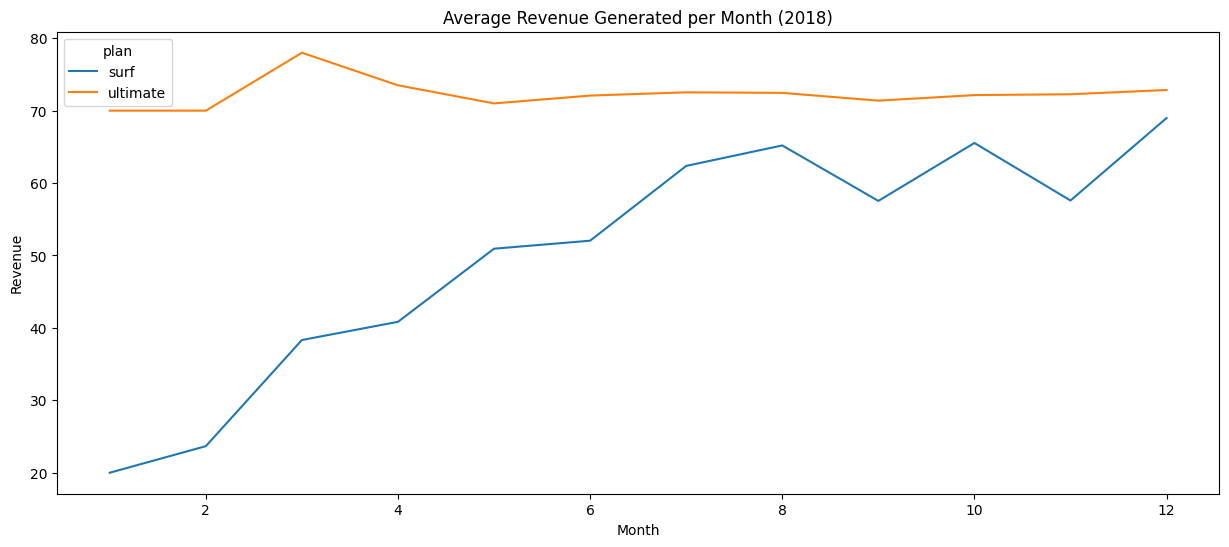

In [53]:
# Creating a pivot table
df_cost_mean_plan = df_global.pivot_table(
    index='month', columns='plan', values='cost_month', aggfunc='mean')

display(df_cost_mean_plan)

# Creating line chart
df_cost_mean_plan.plot(kind='line', figsize=(15, 6))
plt.title('Average Revenue Generated per Month (2018)')
plt.ylabel('Revenue')
plt.xlabel('Month')

# Calculating the average internet/data per plan
df_cost_mean_year_surf = df_cost_mean_plan['surf'].mean()
print('Average revenue generated by those who have the Surf Plan:', df_cost_mean_year_surf)
df_cost_mean_year_ultimate = df_cost_mean_plan['ultimate'].mean()
print('Average revenue generated by those who have the Ultimate Plan:', df_cost_mean_year_ultimate)
print()

# Calculating the Standard Deviation of monthly call duration by plan
df_cost_std_year_surf = df_cost_mean_plan['surf'].std()
print('The Standard Deviation (variation) of the revenue generated by those who have the Surf Plan:', df_cost_std_year_surf)
df_cost_std_year_ultimate = df_cost_mean_plan['ultimate'].std()
print('The Standard Deviation (variation) of the revenue generated by those who have the Ultimate Plan:', df_cost_std_year_ultimate)

Revenue grew throughout the year, with the **Surf** plan having the greatest impact, with a higher volume starting in March and accounting for **65.07%** of the total revenue collected in December.

The average revenue generated by **Ultimate** plan users is very close to the basic value of the plan, while that of **Surf** plan users is more than double the basic value contracted. This is because they frequently require minutes, messages and internet/data beyond what is contracted in their plans. The Standard Deviation among **Surf** plan users is much higher than that of the other plan, demonstrating that there is a very large variation in usage among users of this plan.

## Testing statistical hypotheses

The hypothesis that the average revenue of users of the Ultimate and Surf plans is different will be tested.

The critical level of statistical significance will be 0.05.

Null Hypothesis (H<sub>0</sub>): The average revenue of users of the Ultimate and Surf plans is not different.

Alternative Hypothesis (H<sub>1</sub>): The average revenue of users of the Ultimate and Surf plans is different.

In [54]:
# Creating df`s with the revenues of each plan
df_revenue_plan = df_global[['plan', 'cost_month']]

# Creating a df with only the ultimate plan recipes
df_revenue_ultimate = df_revenue_plan.loc[df_revenue_plan['plan'] == 'ultimate']
df_revenue_ultimate = df_revenue_ultimate.drop('plan', axis=1)
df_revenue_ultimate = df_revenue_ultimate.reset_index(drop=True)
df_revenue_ultimate.columns = ['revenue_ultimate']

# Creating a df with only the surf plan recipes
df_revenue_surf = df_revenue_plan.loc[df_revenue_plan['plan'] == 'surf']
df_revenue_surf = df_revenue_surf.drop('plan', axis=1)
df_revenue_surf = df_revenue_surf.reset_index(drop=True)
df_revenue_surf.columns = ['revenue_surf']

# Testing the hypotheses
# Setting the significance level
alpha = 0.05

results1 = st.ttest_ind(df_revenue_ultimate, df_revenue_surf)
print('p-value:', results1.pvalue)

if results1.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

p-value: [4.73193359e-07]
Reject the null hypothesis.


The null hypothesis was rejected by the equality of means test. This means that the average revenue of Ultimate and Surf plan users is different.

The hypothesis that the average revenue of users in the NY-NJ area is different from that of other areas will be tested.

The critical level of statistical significance will be 0.05.

Null Hypothesis (H<sub>0</sub>): The average revenue of users in the NY-NJ area is not different from that of other areas.

Alternative Hypothesis (H<sub>1</sub>): The average revenue of users in the NY-NJ area is different from that of other areas.

In [55]:
# Creating a df with recipes and cities
df_revenue_city = df_global.merge(df_users, on='user_id')
df_revenue_city = df_revenue_city[['cost_month', 'city']]

# Creating a df with recipes from the NY-NJ area
df_ny_nj = df_revenue_city.loc[df_revenue_city['city'].str.contains('NY-NJ')]
df_ny_nj = df_ny_nj.drop('city', axis=1)
df_ny_nj = df_ny_nj.reset_index(drop=True)
df_ny_nj.columns = ['revenue_ny_nj']

# Creating a df with the revenues from the other areas
df_others = df_revenue_city.loc[~df_revenue_city['city'].str.contains('NY-NJ')]
df_others = df_others.drop('city', axis=1)
df_others = df_others.reset_index(drop=True)
df_others.columns = ['revenue_others']

In [56]:
# Testing the hypotheses
alpha = 0.05

results2 = st.ttest_ind(df_ny_nj, df_others)
print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

p-value: [0.01119693]
Reject the null hypothesis.


The null hypothesis was rejected by the equality of means test. This means that the average revenue of users in the NY-NJ area is different from that of users in other areas.

## General Conclusion

- Data related to dates were redefined to the Date/Time type.
- Missing values ​​in the `churn_date` column were replaced with the date 2018-12-31 because these were active plans when the data was extracted.
- Month columns were created in some dataframes so that it would be possible to perform behavior analysis throughout the year.
- Dataframes were created considering the users and months of the themes below to facilitate the analysis.
- Number of calls
- Total call time
- Messages sent
- Internet/data consumption
- The dataframes created above were aggregated into one so that it would be possible to perform data analysis.
- Throughout the year there was an increase in the number of users in both plans, impacting the number of calls, minutes used, messages sent and internet/data consumed.
- By the end of 2018, the Surf plan was already responsible for 65.07% of revenue.
- Surf plan users require more resources than those contracted in the basic package.
- The average revenue of Ultimate and Surf plan users is different.
- The average revenue of users in the NY-NJ area is different from that of users in other areas.